### Example Code for Reading Output File ###


In [23]:
from astropy.io import ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
infile = 'starmodl.dat'
star = ascii.read(infile,comment='#',delimiter=' ')#,format='no_header')#,header=False)

In [57]:
star

r,Qm,L_r,T,P,rho,kap,eps,rad,dlPdlT
float64,float64,float64,float64,float64,float64,float64,str8,str1,float64
4900000000.0,0.99,-5.1e+31,13000000.0,1.3e+17,80.0,2.0,0.97E+01,r,20.6
5600000000.0,0.98,1.3e+32,12000000.0,1.3e+17,78.0,1.9,0.94E+01,r,5.0
6300000000.0,0.97,3.3e+32,12000000.0,1.3e+17,76.0,1.9,0.89E+01,r,3.9
6900000000.0,0.96,5.7e+32,12000000.0,1.2e+17,73.0,2.0,0.82E+01,r,3.5
7600000000.0,0.94,8.2e+32,12000000.0,1.1e+17,71.0,2.0,0.74E+01,r,3.3
8300000000.0,0.92,1.1e+33,12000000.0,1.1e+17,68.0,2.0,0.65E+01,r,3.3
8900000000.0,0.9,1.3e+33,12000000.0,1e+17,65.0,2.1,0.57E+01,r,3.2
9600000000.0,0.88,1.6e+33,11000000.0,9.4e+16,61.0,2.2,0.49E+01,r,3.2
10000000000.0,0.85,1.8e+33,11000000.0,8.7e+16,58.0,2.2,0.41E+01,r,3.2


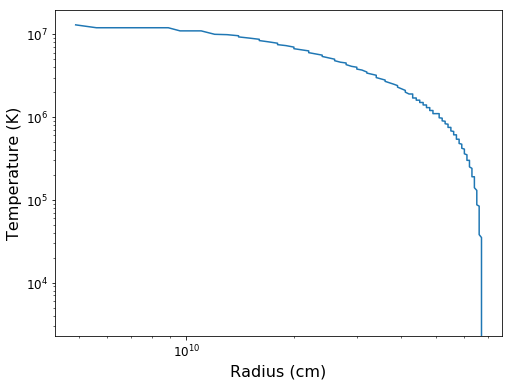

In [63]:
plt.figure(figsize=(8,6))
plt.plot(star['r'],star['T'],label='Temperature')
plt.xlabel('Radius (cm)',fontsize=16)
plt.ylabel('Temperature (K)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')